# MULTIPLE LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Importing Training data and Test Data and Feature Scaling

In [22]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
test_df.dropna()
train_df.dropna()
# Feature Scaling using Z-Score Normalization
mean = train_df.mean()
std = train_df.std()
train_df = (train_df - mean)/std
train_df

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,0.656409,0.569608,-1.044836,-1.111755,-0.069209,-0.084179,0.791341,0.928126,-1.515070,-1.676737,0.034756
1,0.656409,0.237557,-1.044836,-1.111755,-0.312009,-0.638238,0.791341,0.297130,-0.988295,-1.676737,-0.215609
2,-0.810932,-0.392195,0.303637,0.036325,-0.294024,-0.617622,-1.049867,-0.333866,-1.383377,0.786878,-0.641230
3,2.857421,1.680261,1.652111,0.920911,4.579950,3.186057,0.791341,2.190119,1.217576,1.125021,4.679025
4,0.656409,-0.512420,0.303637,-0.349505,0.405149,0.225063,0.791341,-0.333866,0.789571,0.545347,-0.065390
...,...,...,...,...,...,...,...,...,...,...,...
1163,-0.077262,-0.231894,0.303637,-0.170706,-0.865052,-1.272184,-1.049867,-0.333866,0.229872,-0.324164,-0.397124
1164,0.656409,-0.094494,0.303637,-0.349505,-1.512517,-0.937172,0.791341,0.297130,0.657877,0.352122,-0.265682
1165,-0.810932,-1.397889,-1.044836,-1.064703,-0.602019,-0.970673,-1.049867,-0.964862,-0.757831,-1.676737,-0.829003
1166,-0.077262,0.266182,-1.044836,-0.467137,-0.145646,1.276487,-1.049867,0.928126,-0.527367,0.545347,-0.196832


# Implementing Gradient Descent

In [13]:
def gradient_descent(w_updated, b_updated , learning_rate, df):
    der_w = np.zeros(len(w_updated)) # Array storing dervative of cost function with respect to w(i) 
    der_b = 0 # Variable storing deravative of cost function with respect to b
    mean_squared_error = 0
    cost_function = 0 # Variable storing the value of Cost Function 

    # gradient descent
    for i in range(len(df)):
        x = df.iloc[i][:-1].values
        y = df.iloc[i].SalePrice
        prediction = np.dot(x,w_updated) + b_updated
        
        mean_squared_error += ((prediction - y)**2) # Calculating Mean Squared Error
        der_w += ((prediction - y) * x)/float(len(df))
        der_b += (prediction - y)/float(len(df)) 

    cost_function = mean_squared_error*std.SalePrice + mean.SalePrice # Calculating Cost Function
    w = w_updated*(1 - learning_rate*(9/float(len(df)))) - learning_rate*der_w # Updating value of w(i)
    b = b_updated - learning_rate*der_b # Updating value of b
    cost_function = cost_function/float(2*len(df))

    return w , b , cost_function

# Using Gradient Descent for Given Training Data

In [14]:
w = np.zeros(len(train_df.columns) - 1) # Intialising array storing w(i) with initial value as 0
b = 0 # Initialising Variable storing b with intial value as 0
learning_rate = 0.001 # Learning Rate
cost_function = 0 # Cost Function
epochs = 3000
cost_func = [0 for i in range(epochs+1)] #Initialising list to storevalue of cost function for different epochs to be used for plotting graph

# Calling Gradient Descent Function for the Training Set

for i in range (epochs+1):
    w,b,cost_function = gradient_descent(w,b,learning_rate,train_df)
    
    if i%100 == 0:
        print (f"Epoch:{i}")
        print (f" Cost Function:{cost_function}")
        

    cost_func[i] = cost_function #Storing value of cost function for Given Epoch'
    



Epoch:0
 Cost Function:39985.08082907945
Epoch:100
 Cost Function:21137.4137226965
Epoch:200
 Cost Function:14489.018014875088
Epoch:300
 Cost Function:12102.178318244958
Epoch:400
 Cost Function:11208.38237305387
Epoch:500
 Cost Function:10841.301900100865
Epoch:600
 Cost Function:10663.11407461361
Epoch:700
 Cost Function:10555.312705092145
Epoch:800
 Cost Function:10476.00799032195
Epoch:900
 Cost Function:10410.13520740752
Epoch:1000
 Cost Function:10352.064674586842
Epoch:1100
 Cost Function:10299.517184674285
Epoch:1200
 Cost Function:10251.427745664852
Epoch:1300
 Cost Function:10207.190493461649
Epoch:1400
 Cost Function:10166.388215444143
Epoch:1500
 Cost Function:10128.69286308887
Epoch:1600
 Cost Function:10093.827033421549
Epoch:1700
 Cost Function:10061.547624762334
Epoch:1800
 Cost Function:10031.637859395318
Epoch:1900
 Cost Function:10003.902675426421
Epoch:2000
 Cost Function:9978.16562351038
Epoch:2100
 Cost Function:9954.266536027728
Epoch:2200
 Cost Function:9932.05

In [15]:
for i in range(len(train_df.columns) - 1):
    print (f"The value of w({i+1}) is : {w[i]}")
    print("\n")

print (f"The value of b is : {b}")


The value of w(1) is : 0.28118940315164204


The value of w(2) is : 0.215368914423587


The value of w(3) is : 0.0906314420251562


The value of w(4) is : 0.08206184316279136


The value of w(5) is : 0.11384381234972726


The value of w(6) is : 0.09113305487227226


The value of w(7) is : 0.014026076030257779


The value of w(8) is : 0.07793868534460051


The value of w(9) is : 0.08356700068512211


The value of w(10) is : 0.08948245164953113


The value of b is : -4.256587605582243e-16


# Plot of the Cost function after Multiple Epochs 



The Cost function is: 9801.532036424021





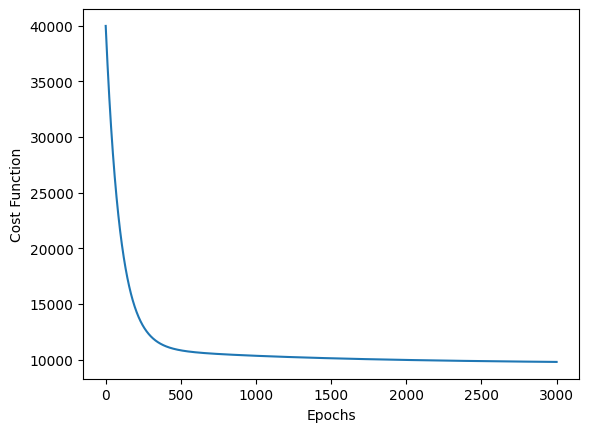

In [16]:
print ("\n")
print (f"The Cost function is: {cost_function}\n")
print ("\n")
plt.plot(range(epochs+1), cost_func)
plt.xlabel("Epochs")
plt.ylabel("Cost Function")
plt.show() # Printing the plot of Cost Function vs Epochs


# Predicting the Prices of the Houses in the Test file and Calculating Accuracy

In [24]:
test_df = pd.read_csv('test.csv')
error = [ 0 for i in range(len(test_df))]
rmse= 0
unscaled_prediction = [ 0 for i in range(len(test_df))]
test_df = (test_df - mean) / std #  Normalizing using Z-Score Normalization
test_df['SalePrice'] = test_df['SalePrice']*std['SalePrice'] + mean['SalePrice'] # Unscaling the Actual Sale Prices
for i in range(len(test_df)):
        x = test_df.iloc[i][:-1].values
        y = test_df.iloc[i].SalePrice
        prediction = np.dot(x,w) + b # Predicting the normalized prices by using values of w and b calculated from training model
        unscaled_prediction[i] =  prediction*std.SalePrice + mean.SalePrice #Unscaling the prediction
        mean_squared_error= ((unscaled_prediction[i]- y)**2) # Calculating Mean Squared Error
        error[i] = math.sqrt(mean_squared_error)
        rmse = rmse + mean_squared_error
test_df['Predicted Prices'] =unscaled_prediction # Appending Prediction Prices column to the Test Dataframe
test_df['Error'] = error # Appending Error Column to the Test DataFrame

rmse = math.sqrt(rmse/len(test_df)) # Calculating the Root Mean Sqaured Error

print ("\n")
print (f"The Root Mean Squared Error is: {rmse}\n")
print ("\n")
test_df




The Root Mean Squared Error is: 33620.13344937718





,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice,Predicted Prices,Error
0,1.390080,0.855859,1.652111,1.302035,0.063431,-0.117680,0.791341,0.928126,1.151729,1.028409,281000.0,269094.184491,11905.815509
1,-0.077262,0.210840,-1.044836,-0.650641,0.411893,1.201753,0.791341,-0.333866,-0.428597,0.158898,139000.0,180863.061351,41863.061351
2,0.656409,-0.569670,0.303637,0.017504,-1.026918,-1.663891,0.791341,-1.595859,1.118805,0.980102,147400.0,172453.608525,25053.608525
3,-0.810932,0.071532,0.303637,1.579645,1.129051,1.013631,-1.049867,-0.964862,-0.757831,-0.565695,153500.0,178153.154238,24653.154238
4,-1.544603,-1.701315,-1.044836,-0.895314,-0.959474,-1.380419,-1.049867,-2.226855,-0.033515,0.835184,86000.0,75754.789189,10245.210811
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,-0.077262,-0.693712,0.303637,0.469207,0.227546,-0.019753,-1.049867,-0.964862,1.085882,0.931796,158000.0,181478.906336,23478.906336
288,-0.077262,-1.020038,-1.044836,-0.998829,-1.289951,-1.759241,-1.049867,-0.964862,0.032332,1.076715,118000.0,124017.097708,6017.097708
289,-0.077262,-1.285297,0.303637,-0.264811,-0.469379,-0.818629,-1.049867,-1.595859,1.052958,0.883490,140000.0,149841.784473,9841.784473
290,0.656409,-0.487612,0.303637,-0.415379,0.470345,0.258565,0.791341,-0.333866,1.184652,1.076715,159895.0,207626.978397,47731.978397
